In [4]:
import pickle

from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
with open("team_stats.pkl", 'rb') as picklefile:
   team_stats = pickle.load(picklefile)

In [7]:
team_stats.head()

,team,season,avg_field_goals,avg_fg_att,avg_fg3_pct,avg_steals,avg_salary,avg_age,avg_per,avg_pct_started,avg_wl_ratio,strong_link,weak_link,opp_3_pct,opp_fg_pct,opp_fg_att,pace
0,Atlanta_Hawks,2006,387.0,866.8,0.2822,73.0,4992921.6,22.8,14.56,0.914634,0.464286,0.747238,-0.680493,0.368,0.478,6433,90.4
1,Atlanta_Hawks,2007,347.0,763.4,0.2750,68.4,5066493.8,22.2,15.82,0.658537,0.576923,0.748424,-0.391165,0.376,0.466,6335,90.0
2,Atlanta_Hawks,2008,418.4,925.4,0.2206,76.6,7488752.0,23.8,16.08,0.858537,0.822222,0.484437,-0.286060,0.362,0.463,6733,91.1
3,Atlanta_Hawks,2009,414.4,898.0,0.2808,77.2,9775806.6,24.8,16.94,0.860976,1.342857,0.349876,-0.296261,0.353,0.454,6609,89.6
4,Atlanta_Hawks,2010,435.2,908.0,0.4122,80.8,8760402.2,25.8,17.08,0.973171,1.827586,0.429577,-0.297760,0.345,0.460,6623,90.1


# Analysis of 10 NBA Seasons

I'm analysing 10 years of NBA seasons to find the relationship between various player stats and the team's win-loss ratio. The model and plots below show relationships between the PER (player efficiency rating) for the starting five and the opposing team's succesful field goal attempt rates and the win/loss ratio.

In [8]:
lm1 = ols("avg_wl_ratio ~ avg_per + opp_fg_pct", data=team_stats).fit()
print lm1.summary()

                            OLS Regression Results                            
Dep. Variable:           avg_wl_ratio   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           4.51e-60
Time:                        18:09:25   Log-Likelihood:                -295.44
No. Observations:                 329   AIC:                             596.9
Df Residuals:                     326   BIC:                             608.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.1629      1.303      6.266      0.0

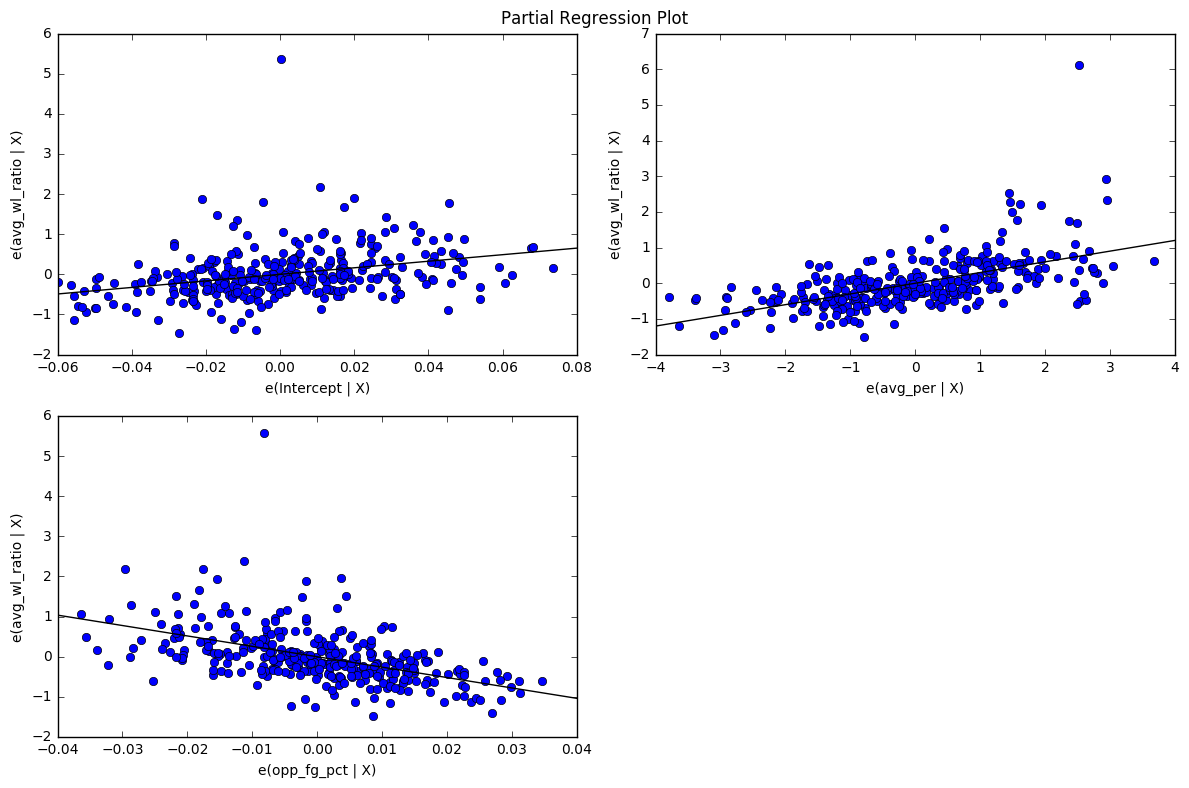

In [9]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lm1, fig=fig)